In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [5]:
movies=pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [7]:
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


From the above table it is clearly visible that Revenue has some of the movies which gained very high Revenue their is huge gap beetween 50% -75% - max value.

Also, from the above data colum it is understood, Revenue and Metascore column has missing values which needs to be treated. But Revenue of the movie is very sensitive and which we can not relace by Mean, Median or Mode filling.

In [8]:
df=movies[~movies['Revenue (Millions)'].isnull()].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


Since Metascore still has few null records left whcih can be replaced using mean value treatment.

In [9]:
max_metascore =df['Metascore'].mean()
df.Metascore.fillna(max_metascore,inplace=True)

Let us first look at the Revenue of all the movies over period of time.

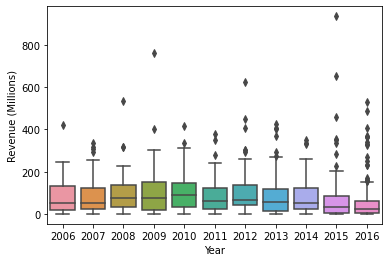

In [10]:
sns.boxplot(data=df,x='Year', y='Revenue (Millions)')
plt.show()

We can observe from above plot, Year 2015 and 2009 clearly has datapoint with highest Revenue generating movie.

Which we will observe in our further analysis.

We
 will be adding a column with 1 in all the rows which will be usefull in our further analysis we wil do. Also, for now we will keep our original Table Sorted by Revenue.

In [11]:
df['cnt']=1

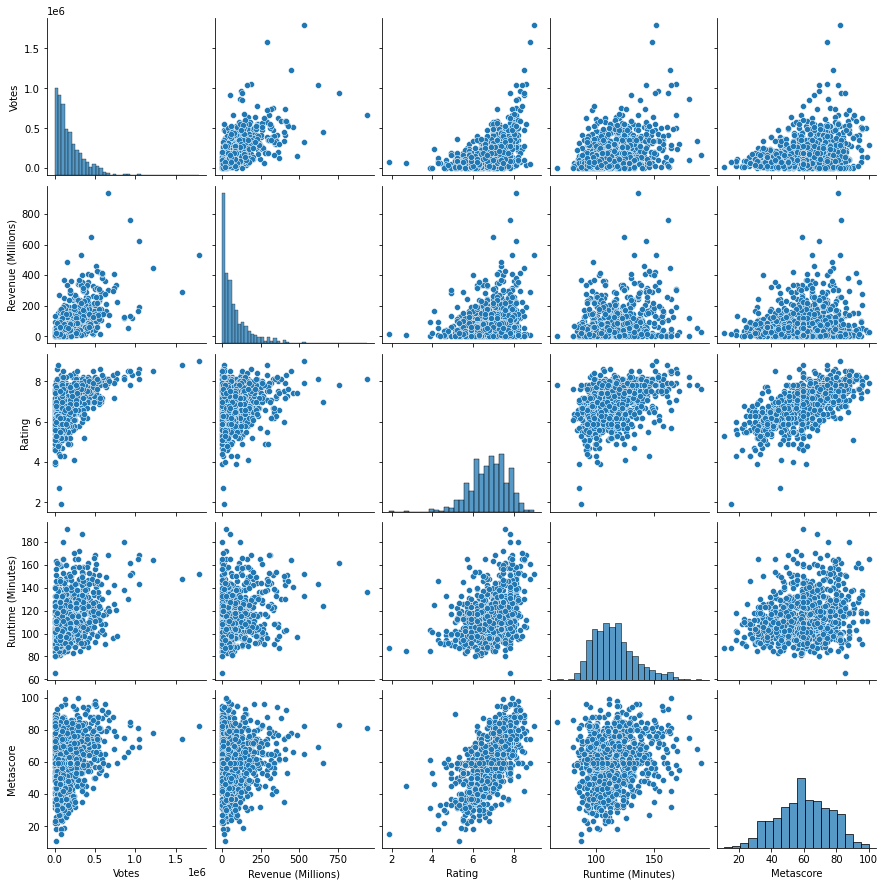

In [13]:
sns.pairplot(data=df, vars=["Votes", "Revenue (Millions)","Rating",
                            "Runtime (Minutes)","Metascore"])
plt.show()

The above Pairplot gives us the basic understanding on distribution of all the numerical column.

If we look at the Relationship of Revenue and Votes- YOY

In [14]:
px.scatter(df,x='Revenue (Millions)',y='Votes',size='Votes', 
           color = 'Rating',hover_name='Title',animation_frame='Year',
           title="Distribution of Revenue and Votes")

NameError: name 'px' is not defined

From the above plot we observe that their are movies which has Higher Rating along with Higher Votes still Revenue is not up to the Mark. Year - 2012 (Django Unchained) Year - 2014 (Interstellar) Year - 2006 (The Prestige,The Departed)

Splitting the Genre and Actor Table for another set of visulaizations

In [17]:
df[['Genre1', 'Genre2','Genre3']] = df['Genre'].str.split(',', 3, expand=True).fillna(value="")
df[['Actor1', 'Actor2','Actor3']] = df['Actors'].str.split(',', 2,expand=True).fillna(value="")

In [18]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,"Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,"Michael Fassbender, Charlize Theron"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,Horror,Thriller,,James McAvoy,Anya Taylor-Joy,"Haley Lu Richardson, Jessica Sula"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,"Seth MacFarlane, Scarlett Johansson"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,Action,Adventure,Fantasy,Will Smith,Jared Leto,"Margot Robbie, Viola Davis"
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,1,Action,Adventure,Fantasy,Matt Damon,Tian Jing,"Willem Dafoe, Andy Lau"
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,1,Comedy,Drama,Music,Ryan Gosling,Emma Stone,"Rosemarie DeWitt, J.K. Simmons"
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,1,Action,Adventure,Biography,Charlie Hunnam,Robert Pattinson,"Sienna Miller, Tom Holland"
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,1,Adventure,Drama,Romance,Jennifer Lawrence,Chris Pratt,"Michael Sheen,Laurence Fishburne"
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,1,Adventure,Family,Fantasy,Eddie Redmayne,Katherine Waterston,"Alison Sudol,Dan Fogler"


In [19]:
df['Genre2']=df['Genre2'].fillna(df.Genre1, inplace=True)
df['Genre3']=df['Genre3'].fillna(df.Genre1,inplace=True)

In [20]:
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,Action,None,None,Chris Pratt,Vin Diesel,"Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,Adventure,None,None,Noomi Rapace,Logan Marshall-Green,"Michael Fassbender, Charlize Theron"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,Horror,None,None,James McAvoy,Anya Taylor-Joy,"Haley Lu Richardson, Jessica Sula"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,Animation,None,None,Matthew McConaughey,Reese Witherspoon,"Seth MacFarlane, Scarlett Johansson"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,Action,None,None,Will Smith,Jared Leto,"Margot Robbie, Viola Davis"


In [21]:
df_by_genre1 = df.groupby('Genre1')
df_by_genre2 = df.groupby('Genre2')
df_by_genre3 = df.groupby('Genre3')
agg_genre1=df_by_genre1.sum()
agg_genre2=df_by_genre2.sum()
agg_genre3=df_by_genre3.sum()
ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp=final_genre.reset_index().head(10)
genre_temp

,Genre1,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt
0,Action,116887.0,555447.0,32613.0,1832.2,68054324.0,33697.82,14823.601432,276.0
1,Adventure,33383.0,142862.0,8536.0,495.0,16911278.0,8055.20,4401.725537,71.0
2,Animation,22728.0,94592.0,4591.0,343.7,10192662.0,8987.50,3295.150358,47.0
3,Biography,30041.0,120799.0,7398.0,442.9,9743517.0,3357.27,4122.875895,60.0
4,Comedy,89117.0,313969.0,16831.0,1022.3,19948763.0,8046.83,8808.875895,156.0
5,Crime,28089.0,108634.0,6471.0,379.8,10459846.0,2216.35,3393.575179,54.0
6,Drama,79019.0,313932.0,18325.0,1100.6,24137985.0,5596.42,10207.601432,156.0
7,Fantasy,1367.0,4020.0,195.0,13.3,354186.0,126.22,121.000000,2.0
8,Horror,20045.0,70448.0,3521.0,213.5,3448962.0,1398.14,1904.575179,35.0
9,Mystery,6422.0,22129.0,1212.0,76.0,2823557.0,708.17,648.000000,11.0


After grouping and adding all the Genre we observe that Action has the maximum Revenue and followed by Adventure.

In [22]:
sns.set(style="darkgrid")

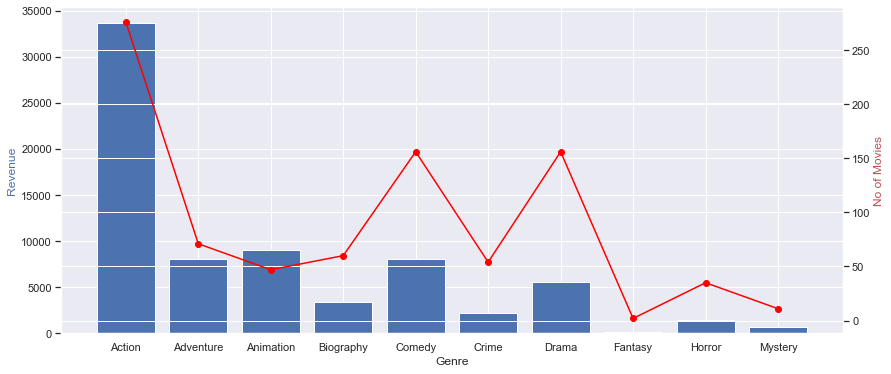

In [23]:
fig, ax1 = plt.subplots(figsize = (14,6))

ax2 = ax1.twinx()
ax1.bar(genre_temp['Genre1'],genre_temp['Revenue (Millions)'])
ax2.plot(genre_temp['Genre1'],genre_temp['cnt'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Revenue', color='b')
ax2.set_ylabel('No of Movies', color='r')
plt.show()

Genre - Action has maximum numbers of movies and which generates maximum Revenue compared to other Genre. But if we look at Drama and Comedy has on an average 150 nos of movies but generates very less revenue in comparision with other category of Genre and respective Revenues.

Considering the number of movies released in a year the no of releases increaing linearly and year 2016 seems to have spike in no of relases. But Same growth is not observed for Revenue.

In [24]:
df_year = df.groupby('Year')['cnt'].count().reset_index()
px.line(df_year, x='Year',y='cnt',template='plotly_dark',text='cnt',
        title="No of releases in Year")

NameError: name 'px' is not defined

In [25]:
df_Rev = df.groupby('Year')['Revenue (Millions)'].sum().round(1).reset_index()
px.line(df_Rev, x='Year',y='Revenue (Millions)',template='plotly_dark',text='Revenue (Millions)',
        title="Revenue in Years")

NameError: name 'px' is not defined

In [26]:
df_2016 = df[df['Year']==2016].copy()
df_temp=df_2016.sort_values(by='Revenue (Millions)',ascending = False).head(10)
px.bar(df_temp,y='Revenue (Millions)',x='Title',color='Genre1',text='Rating',
       title='Most successful Movies/Genre of Year:2016')

NameError: name 'px' is not defined

Now considering within year 2016 released movies

Top Revenue generating movies in year 2016 and their Ratings !

Captain America and Rouge One is most Revenue generating movies of Year 2016 being below 8 Rating. and on the other hand Deadpool and Zootopia having Rating above 8 still the revenue Ranks at 4th and 5th.

One point to observe here Zootopia belongs to Genre - Animation and that can be one of reason of lagging behine in Revenue but still high in Rating.

/Users/fasil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


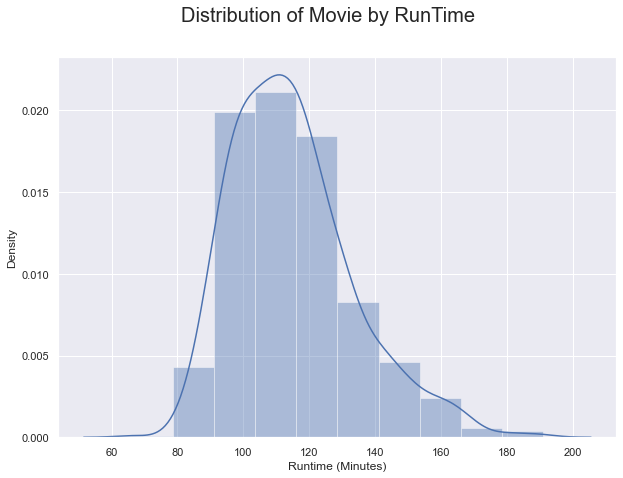

In [27]:
plt.figure(figsize=(10,7),facecolor='white')
sns.distplot(df['Runtime (Minutes)'],bins=10,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

Most of Movies Belongs to Runtime Range - 90 to 130 Minutes !

In [28]:
movies_Rev=df.sort_values(by='Revenue (Millions)',ascending = False)[0:10]
px.pie(movies_Rev, values='Revenue (Millions)', names='Actor1',title='Actors vs Revenue Distribution')

NameError: name 'px' is not defined

In [29]:
px.pie(movies_Rev, values='Revenue (Millions)', names='Title', title='Movies vs Revenue Distribution')

NameError: name 'px' is not defined

If We consider the Primary actor of the Movies and and Revenue Generated by respective movie is Robert Downey Jr.

But that is not the case, chances are on the above plot we distribution of Revenue is additing of one or more movies done by respective Actor.

We will further analyse on this part !!

In [30]:
px.bar(movies_Rev,x='Actor1',y='Revenue (Millions)',color='Votes',
       hover_name='Title', text='Rating',template='plotly_dark')

NameError: name 'px' is not defined

Now from above Plot, it is clear that why Revenue generated by the Movies of Robert Downey Jr. is Highest amon the all because it has more than one movie.

Also, a intresting point to observe from above plot -> Movie - The Dark Knight got the Highest Rating of 9 and Highest Votes above 1.6M still below average Revenue generated by Movie copare to other Movie and actor

Consider the list of Top Directors and their critic score 

In [31]:
top_director= df.groupby('Director')['Revenue (Millions)'].sum().reset_index()
top_director.sort_values('Revenue (Millions)',ascending =False)[0:5]

,Director,Revenue (Millions)
204,J.J. Abrams,1683.45
129,David Yates,1630.51
90,Christopher Nolan,1515.09
349,Michael Bay,1421.32
159,Francis Lawrence,1299.81


In [32]:
px.bar(movies_Rev,x='Director',y='Revenue (Millions)',
       color='Metascore',hover_name='Title',
       template='plotly_dark',text='Revenue (Millions)', title='Top Directors and Revenue Distribution by Metascore')

NameError: name 'px' is not defined

In [33]:
movies_Votes=df.sort_values(by='Votes',ascending = False)[0:20]

px.bar(movies_Votes,x='Actor1',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Rating',template='plotly_dark',
      title='Most Popular/Voted Actors')

NameError: name 'px' is not defined

In [34]:
px.bar(movies_Votes,x='Title',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Metascore',template='plotly_dark',
      title='Most Popular/Voted Movies')

NameError: name 'px' is not defined

We can extract list of Top Actors by Revenue generated in Movies. 
And from that the distribution of Revenue and Rating for Top Actors is obtained.

In [35]:
top_Actor = pd.pivot_table(df,index=['Actor1'],
                           values=['Revenue (Millions)','Metascore','Votes','Rating','cnt'],
                           aggfunc={'Revenue (Millions)':np.sum,'Metascore':np.mean,
                                    'Votes':np.mean,'Rating':np.mean,'cnt':np.sum})

In [36]:
actor = top_Actor.sort_values(by='Revenue (Millions)',
                              ascending = False).reset_index()[0:20]
actor

,Actor1,Metascore,Rating,Revenue (Millions),Votes,cnt
0,Robert Downey Jr.,60.750000,7.512500,2564.58,556738.500000,8
1,Jennifer Lawrence,61.666667,6.950000,1607.87,347564.666667,6
2,Christian Bale,69.181818,7.318182,1559.62,492911.909091,11
3,Will Smith,50.063909,6.977778,1340.28,275772.666667,9
4,Johnny Depp,56.946897,6.800000,1280.94,307826.625000,8
5,Daniel Radcliffe,63.142857,7.157143,1279.28,262638.571429,7
6,Shia LaBeouf,48.115036,6.580000,1254.36,310977.400000,5
7,Chris Pratt,72.666667,7.633333,1243.07,492917.000000,3
8,Kristen Stewart,57.500000,5.483333,1221.95,198119.166667,6
9,Leonardo DiCaprio,68.666667,7.922222,1117.86,654595.333333,9


In [37]:
px.scatter(actor,y= 'Revenue (Millions)',x= 'Rating', 
           color= 'cnt',size='Rating',text='Actor1',
           title='Revenue Vs Rating of most Popular Actor and No of Movies')

NameError: name 'px' is not defined

In [38]:
px.histogram(df, x='Metascore',y='Revenue (Millions)',title='Impact of Metascore on Revenue')

NameError: name 'px' is not defined

We can observe from the above plot - Metascore from 55 to 70 seems to have highest Revenue !

In [39]:
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [40]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,Action,None,None,Chris Pratt,Vin Diesel,"Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,Adventure,None,None,Noomi Rapace,Logan Marshall-Green,"Michael Fassbender, Charlize Theron"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,Horror,None,None,James McAvoy,Anya Taylor-Joy,"Haley Lu Richardson, Jessica Sula"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,Animation,None,None,Matthew McConaughey,Reese Witherspoon,"Seth MacFarlane, Scarlett Johansson"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,Action,None,None,Will Smith,Jared Leto,"Margot Robbie, Viola Davis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,1,Action,None,None,Milla Jovovich,Ali Larter,"Wentworth Miller,Kim Coates"
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,1,Comedy,None,None,Thomas Mann,Oliver Cooper,"Jonathan Daniel Brown, Dax Flame"
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,1,Horror,None,None,Lauren German,Heather Matarazzo,"Bijou Phillips, Roger Bart"
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,1,Drama,None,None,Robert Hoffman,Briana Evigan,"Cassie Ventura, Adam G. Sevani"


In [41]:
df2=df.copy()

In [42]:
df2=df2.drop(columns=["Rank","Title","Genre","Description","Actors","Year","Director","cnt","Genre2","Genre3","Actor1","Actor2","Actor3"],axis=1)
df2

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1
0,121,8.1,757074,333.13,76.0,Action
1,124,7.0,485820,126.46,65.0,Adventure
2,117,7.3,157606,138.12,62.0,Horror
3,108,7.2,60545,270.32,59.0,Animation
4,123,6.2,393727,325.02,40.0,Action
...,...,...,...,...,...,...
993,97,5.9,140900,60.13,37.0,Action
994,88,6.7,164088,54.72,48.0,Comedy
996,94,5.5,73152,17.54,46.0,Horror
997,98,6.2,70699,58.01,50.0,Drama


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
genre=le.fit_transform(df2['Genre1'])
df2['genre_enc']=genre
df2

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,genre_enc
0,121,8.1,757074,333.13,76.0,Action,0
1,124,7.0,485820,126.46,65.0,Adventure,1
2,117,7.3,157606,138.12,62.0,Horror,8
3,108,7.2,60545,270.32,59.0,Animation,2
4,123,6.2,393727,325.02,40.0,Action,0
...,...,...,...,...,...,...,...
993,97,5.9,140900,60.13,37.0,Action,0
994,88,6.7,164088,54.72,48.0,Comedy,4
996,94,5.5,73152,17.54,46.0,Horror,8
997,98,6.2,70699,58.01,50.0,Drama,6


In [44]:
df2['Genre1'].unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Mystery', 'Sci-Fi', 'Fantasy',
       'Romance', 'Thriller'], dtype=object)

In [45]:
df2=df2.drop(columns=['Genre1'],axis=1)
df2

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genre_enc
0,121,8.1,757074,333.13,76.0,0
1,124,7.0,485820,126.46,65.0,1
2,117,7.3,157606,138.12,62.0,8
3,108,7.2,60545,270.32,59.0,2
4,123,6.2,393727,325.02,40.0,0
...,...,...,...,...,...,...
993,97,5.9,140900,60.13,37.0,0
994,88,6.7,164088,54.72,48.0,4
996,94,5.5,73152,17.54,46.0,8
997,98,6.2,70699,58.01,50.0,6


In [46]:
X=df2.drop("genre_enc",axis=1)
y=df2['genre_enc']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))


In [50]:
genres=['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Mystery', 'Sci-Fi', 'Fantasy',
       'Romance', 'Thriller']

In [51]:
y_pred=np.rint(y_pred)
a=[]
for i in y_pred:
  a.append(int(i))

a=np.array(a)
a

array([3, 3, 3, 3, 2, 3, 4, 4, 2, 3, 3, 3, 2, 4, 1, 3, 3, 3, 2, 3, 4, 2,
       3, 2, 3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 4, 2, 4, 2, 5, 3, 1, 1, 3, 3,
       4, 2, 3, 1, 4, 4, 3, 4, 4, 3, 0, 3, 2, 4, 3, 4, 3, 3, 3, 3, 2, 1,
       3, 5, 4, 4, 4, 2, 3, 3, 4, 3, 4, 2, 4, 3, 2, 2, 4, 4, 3, 2, 4, 5,
       3, 0, 4, 3, 3, 3, 0, 3, 1, 4, 5, 3, 4, 2, 1, 4, 4, 5, 3, 4, 3, 3,
       1, 4, 3, 3, 1, 3, 1, 3, 4, 1, 4, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 2,
       3, 3, 2, 4, 3, 3, 2, 3, 2, 2, 4, 4, 0, 3, 1, 4, 3, 3, 3, 3, 3, 3,
       1, 3, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3])

In [52]:
print(genres[int(np.round_((regressor.predict([[178,9.1,1600,250,76]]))))])

Horror


/Users/fasil/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
df3=df.copy()
df4=df.copy()
df5=df.copy()

In [54]:
df3=df3.drop(columns=["Rank","Title","Genre","Description","Actors","Year","cnt","Genre2","Genre3","Actor1","Actor2","Actor3"],axis=1)
df4=df4.drop(columns=["Rank","Title","Genre","Description","Actors","Director","Year","cnt","Genre2","Genre3","Actor2","Actor3"],axis=1)
df5=df5.drop(columns=["Rank","Title","Genre","Description","Actors","Director","Year","cnt","Genre2","Genre3","Actor1","Actor3"],axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
genre=le.fit_transform(df3['Genre1'])
df3['genre_enc']=genre
df3=df3.drop(columns=['Genre1'],axis=1)
df3

,Director,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genre_enc
0,James Gunn,121,8.1,757074,333.13,76.0,0
1,Ridley Scott,124,7.0,485820,126.46,65.0,1
2,M. Night Shyamalan,117,7.3,157606,138.12,62.0,8
3,Christophe Lourdelet,108,7.2,60545,270.32,59.0,2
4,David Ayer,123,6.2,393727,325.02,40.0,0
...,...,...,...,...,...,...,...
993,Paul W.S. Anderson,97,5.9,140900,60.13,37.0,0
994,Nima Nourizadeh,88,6.7,164088,54.72,48.0,4
996,Eli Roth,94,5.5,73152,17.54,46.0,8
997,Jon M. Chu,98,6.2,70699,58.01,50.0,6


In [56]:
X = df3.drop('Director',axis=1)
y = df3['Director']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

In [58]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

zsh:1: command not found: apt-get


ModuleNotFoundError: No module named 'pydot'

In [ ]:
!pip install six
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [60]:
dot_data = StringIO()
export_graphviz(clf, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

NameError: name 'StringIO' is not defined

In [61]:
Image(graph.create_png())

NameError: name 'Image' is not defined

In [62]:
genre=le.fit_transform(df4['Genre1'])
df4['genre_enc']=genre
df4=df4.drop(columns=['Genre1'],axis=1)
genre=le.fit_transform(df5['Genre1'])
df5['genre_enc']=genre
df5=df5.drop(columns=['Genre1'],axis=1)

In [63]:
X = df4.drop('Actor1',axis=1)
y = df4['Actor1']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
X = df5.drop('Actor2',axis=1)
y = df5['Actor2']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc2 = RandomForestClassifier()
rfc2.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
import pickle
pickle.dump(clf, open('DT.pkl', 'wb'))
pickle.dump(rfc, open('RFC.pkl', 'wb'))
pickle.dump(rfc2, open('RFC2.pkl', 'wb'))

In [68]:
pickle.dump(regressor,open('regressor.pkl','wb'))